In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
# import warnings
# warnings.filterwarnings('ignore')

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-v0_8-whitegrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)
    
# tqdm
from tqdm.notebook import tqdm

# data
path = 'c:/reposit/data/GBG/'

In [7]:
df = pd.read_csv(path + 'data_cosis.csv', encoding='cp949')
df.shape

(607, 9)

In [8]:
df

,시점,산업중분류별(1),산업중분류별(2),사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?)
0,2012,총계,소계,1825296,15548423,92256,1864,0.59,1.20
1,2012,광업,소계,1070,13122,911,320,6.94,243.87
2,2012,광업,석탄광업,20,4322,644,279,14.90,645.53
3,2012,광업,금속 및 비금속광업,51,375,51,20,13.60,533.33
4,2012,광업,채석업,73,540,52,9,9.63,166.67
...,...,...,...,...,...,...,...,...,...
602,2021,기타의 사업,도소매·음식·숙박업,901995,3288485,20569,122,0.63,0.37
603,2021,기타의 사업,부동산업 및 임대업,63391,138831,242,10,0.17,0.72
604,2021,기타의 사업,국가 및 지방자치단체의 사업,36376,666566,4981,16,0.75,0.24
605,2021,기타의 사업,주한미군,177,21872,35,2,0.16,0.91


In [10]:
df['산업중분류별(1)'].unique()

array(['총계', '광업', '제조업', '전기·가스·증기 및 수도사업', '건설업', '운수·창고 및 통신업', '임업',
       '어업', '농업', '금융 및 보험업', '기타의 사업'], dtype=object)

In [125]:
df1 = df.loc[df['산업중분류별(2)']!='소계'].copy()
df1.index = range(0, len(df1))
df1.shape

(497, 9)

## 데이터

In [120]:
df1.head(3)

,시점,산업중분류별(1),산업중분류별(2),사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?)
0,2012,광업,석탄광업,20,4322,644,279,14.90,645.53
1,2012,광업,금속 및 비금속광업,51,375,51,20,13.60,533.33
2,2012,광업,채석업,73,540,52,9,9.63,166.67


In [74]:
# 연도
year = df1.시점.unique()

# 산업분류
cate1 = df1['산업중분류별(1)'].unique()

# 산업분류 2
cate2 = df1['산업중분류별(2)'].unique()

## 연도별 데이터 확인

### 근로자 수

In [48]:
df_year = df1.groupby('시점')['근로자수 (명)'].sum().to_frame('cnt')
df_year

,cnt
시점,
2012,15548423
2013,15449228
2014,17062308
2015,17968931
2016,18431716
2017,18560142
2018,19073438
2019,18725160
2020,18974513


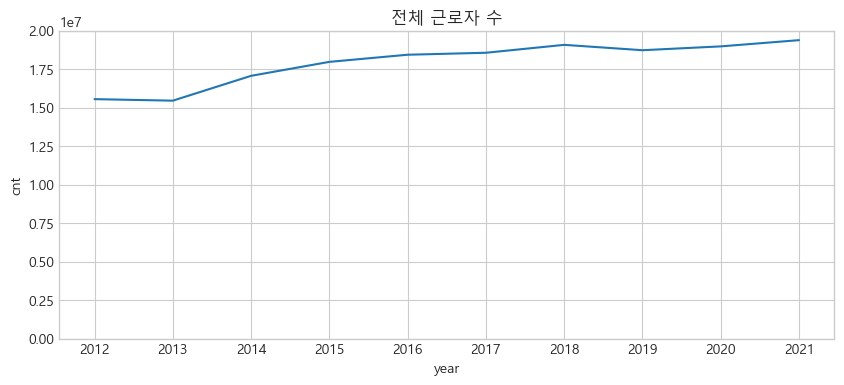

In [61]:
plt.figure(figsize=(10, 4))

sns.lineplot(x=df_year.index, y=df_year.cnt)
plt.title('전체 근로자 수')
plt.xticks(range(2012, 2022))
plt.xlabel('year')
plt.ylim(0, 20000000)

plt.show()

In [62]:
df1

,시점,산업중분류별(1),산업중분류별(2),사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?)
2,2012,광업,석탄광업,20,4322,644,279,14.90,645.53
3,2012,광업,금속 및 비금속광업,51,375,51,20,13.60,533.33
4,2012,광업,채석업,73,540,52,9,9.63,166.67
5,2012,광업,석회석광업,85,1419,29,3,2.04,21.14
6,2012,광업,기타광업,841,6466,135,9,2.09,13.92
...,...,...,...,...,...,...,...,...,...
602,2021,기타의 사업,도소매·음식·숙박업,901995,3288485,20569,122,0.63,0.37
603,2021,기타의 사업,부동산업 및 임대업,63391,138831,242,10,0.17,0.72
604,2021,기타의 사업,국가 및 지방자치단체의 사업,36376,666566,4981,16,0.75,0.24
605,2021,기타의 사업,주한미군,177,21872,35,2,0.16,0.91


In [65]:
df_2012 = df1[df1['시점']==2012]
df_2012.head(3)

,시점,산업중분류별(1),산업중분류별(2),사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?)
2,2012,광업,석탄광업,20,4322,644,279,14.90,645.53
3,2012,광업,금속 및 비금속광업,51,375,51,20,13.60,533.33
4,2012,광업,채석업,73,540,52,9,9.63,166.67


In [86]:
len(year)

10

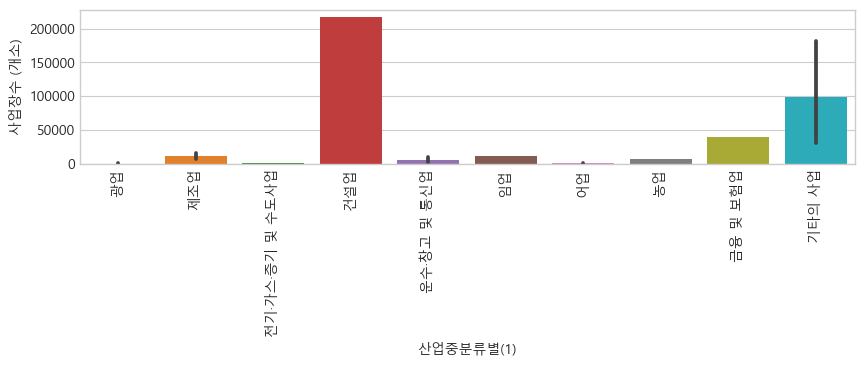

In [85]:

plt.figure(figsize=(10, 2))

sns.barplot(data=df_2012, x='산업중분류별(1)', y='사업장수 (개소)')

plt.xticks(rotation=90)

plt.show()

### 사업장수

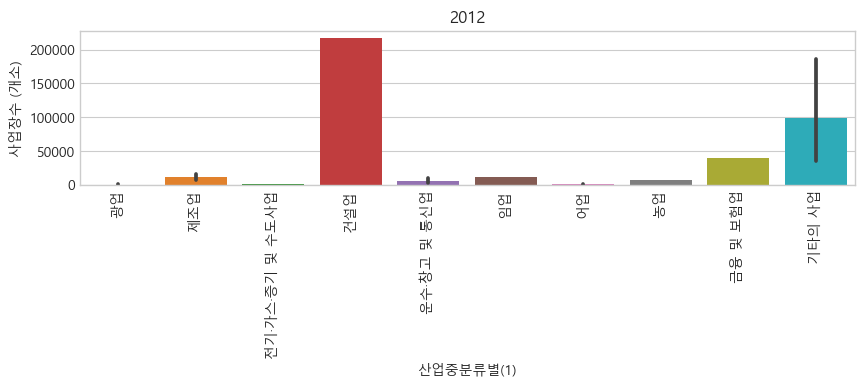

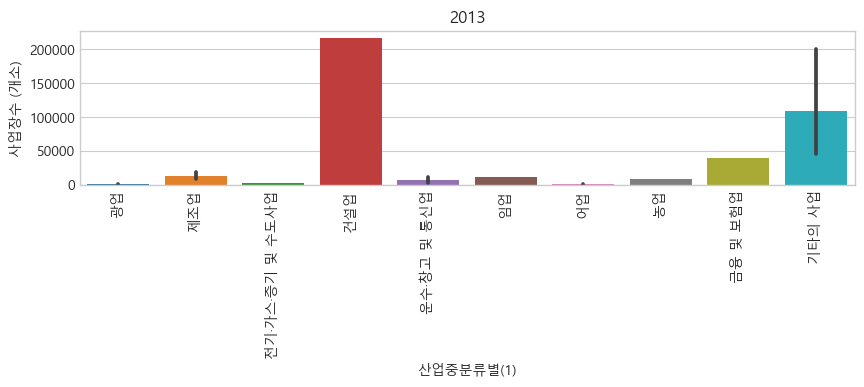

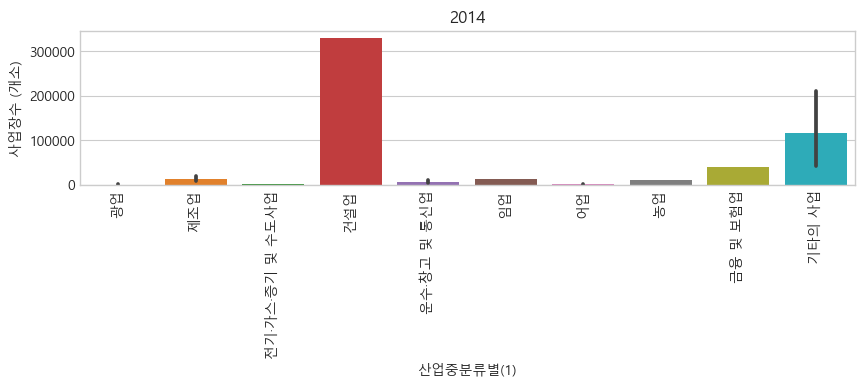

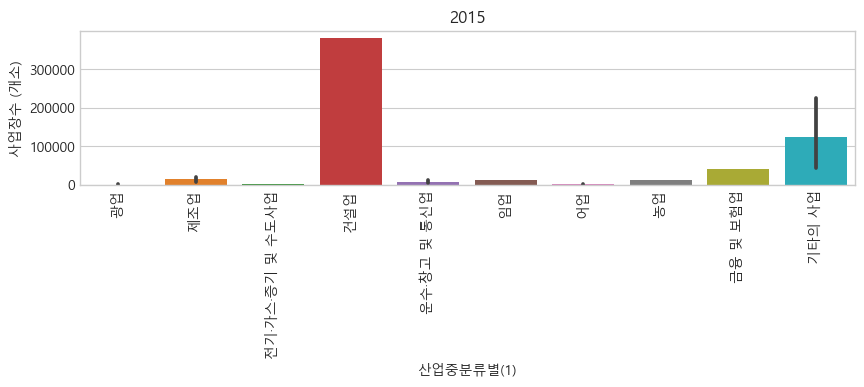

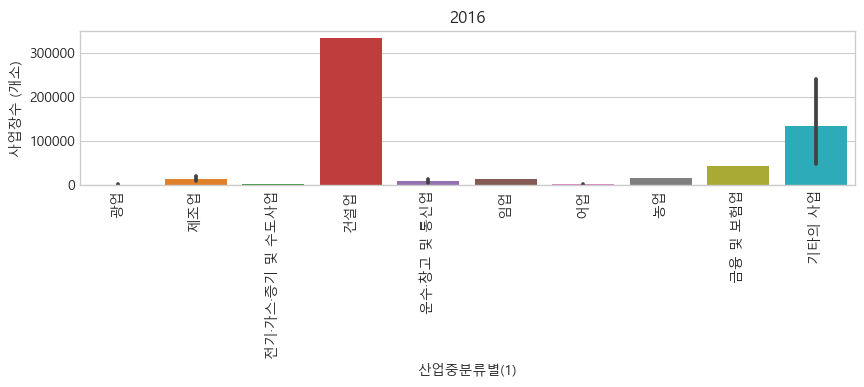

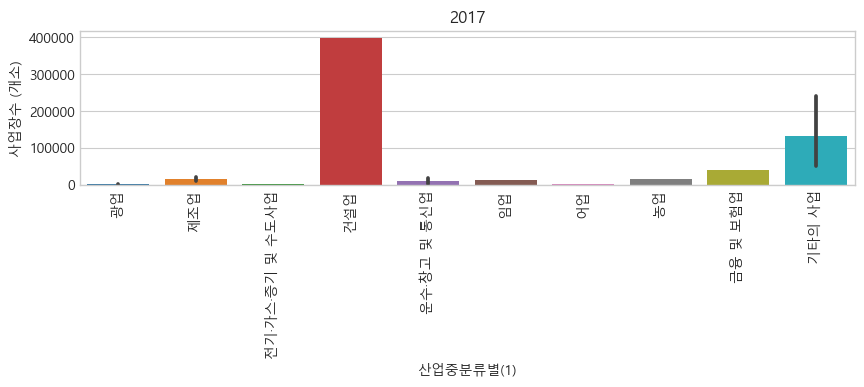

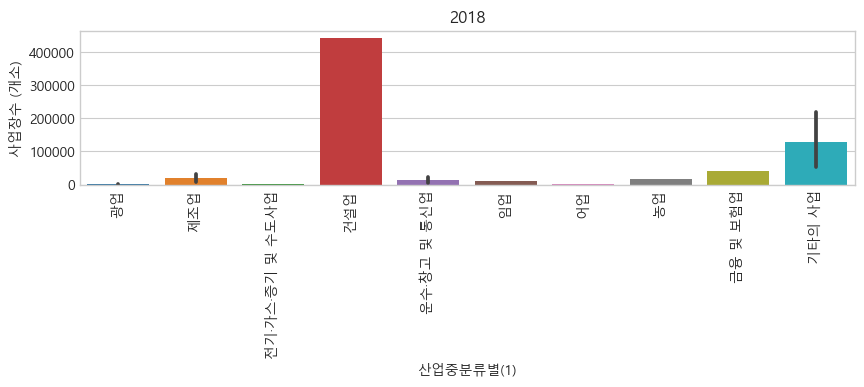

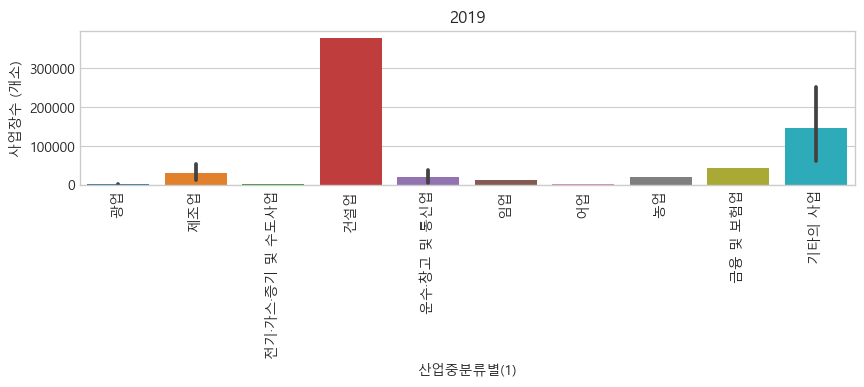

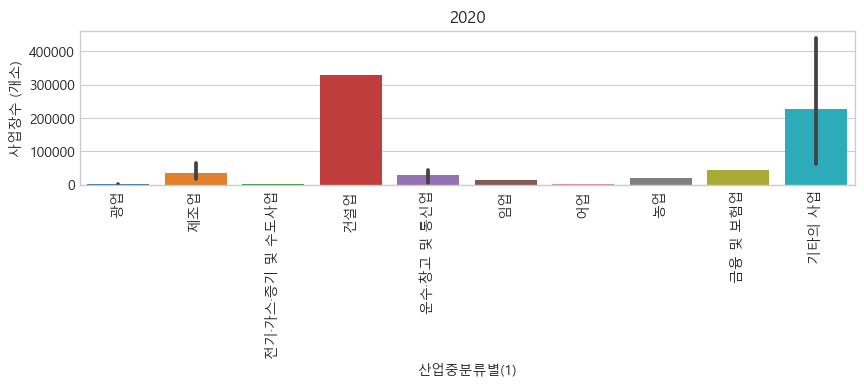

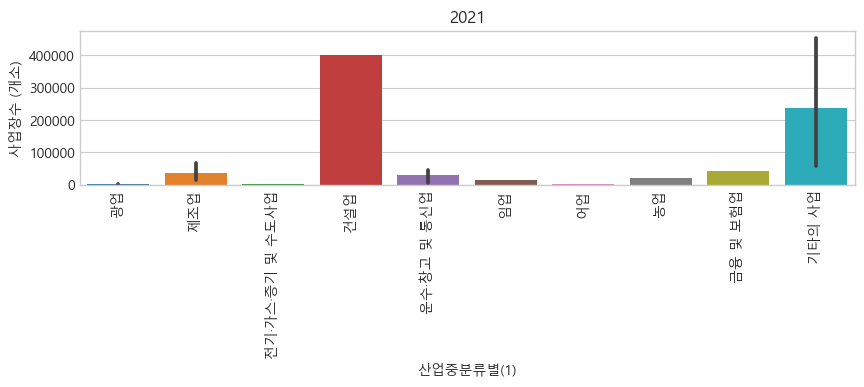

In [91]:
for i in range(len(year)):
    y = year[i]
    
    df1[df1['시점']==y]
    
    # 그래프
    plt.figure(figsize=(10, 2))
    sns.barplot(data=df1[df1['시점']==y], x='산업중분류별(1)', y='사업장수 (개소)')
    plt.title(y)
    plt.xticks(rotation=90)
    plt.show()

In [92]:
df1

,시점,산업중분류별(1),산업중분류별(2),사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?)
2,2012,광업,석탄광업,20,4322,644,279,14.90,645.53
3,2012,광업,금속 및 비금속광업,51,375,51,20,13.60,533.33
4,2012,광업,채석업,73,540,52,9,9.63,166.67
5,2012,광업,석회석광업,85,1419,29,3,2.04,21.14
6,2012,광업,기타광업,841,6466,135,9,2.09,13.92
...,...,...,...,...,...,...,...,...,...
602,2021,기타의 사업,도소매·음식·숙박업,901995,3288485,20569,122,0.63,0.37
603,2021,기타의 사업,부동산업 및 임대업,63391,138831,242,10,0.17,0.72
604,2021,기타의 사업,국가 및 지방자치단체의 사업,36376,666566,4981,16,0.75,0.24
605,2021,기타의 사업,주한미군,177,21872,35,2,0.16,0.91


### 재해 수

In [126]:
# 재해 수 = 요양 + 사망
df1.loc[:, '재해수'] = df1['요양재해자수 (명)'] + df1['사망자수 (명)']
df1.head(3)

,시점,산업중분류별(1),산업중분류별(2),사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?),재해수
0,2012,광업,석탄광업,20,4322,644,279,14.90,645.53,923
1,2012,광업,금속 및 비금속광업,51,375,51,20,13.60,533.33,71
2,2012,광업,채석업,73,540,52,9,9.63,166.67,61


In [127]:
df1.describe()

,시점,사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?),재해수
count,497.000000,497.000000,4.970000e+02,497.000000,497.000000,497.000000,497.000000,497.000000
mean,2015.855131,48797.672032,3.605079e+05,1988.452716,39.217304,2.056781,32.610825,2027.670020
std,2.691672,113611.998781,6.555008e+05,4299.646542,91.727139,9.150371,175.223116,4373.637126
min,2012.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,2533.000000,4.255600e+04,176.000000,5.000000,0.260000,0.390000,179.000000
50%,2016.000000,10420.000000,9.808500e+04,588.000000,11.000000,0.580000,1.030000,595.000000
75%,2018.000000,34456.000000,3.352640e+05,1816.000000,30.000000,0.970000,2.010000,1874.000000
max,2021.000000,901995.000000,3.814557e+06,29943.000000,579.000000,120.540000,1521.570000,30494.000000


In [141]:
df1[df1['산업중분류별(1)']=='건설업']

,시점,산업중분류별(1),산업중분류별(2),사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?),재해수
33,2012,건설업,건설업,217136,2786587,23349,496,0.84,1.78,23845
93,2013,건설업,건설업,216320,2566832,23600,567,0.92,2.21,24167
153,2014,건설업,건설업,329061,3249687,23669,486,0.73,1.50,24155
213,2015,건설업,건설업,380944,3358813,25132,493,0.75,1.47,25625
273,2016,건설업,건설업,333201,3152859,26570,554,0.84,1.76,27124
329,2017,건설업,건설업,397405,3046523,25649,579,0.84,1.90,26228
376,2018,건설업,건설업,441758,2943742,27686,570,0.94,1.94,28256
416,2019,건설업,건설업,378343,2487807,27211,517,1.09,2.08,27728
451,2020,건설업,건설업,329279,2284916,26799,567,1.17,2.48,27366
481,2021,건설업,건설업,400990,2378751,29943,551,1.26,2.32,30494


광업
      사업장수 (개소)  근로자수 (명)   재해수
시점                             
2012       1070     13122  1231
2013       1090     11647  1301
2014       1107     11715  1636
2015       1108     11615  1886
2016       1105     11153  1898
2017       1054     11199  2354
2018       1078     11697  2703
2019       1082     11108  2949
2020       1087     10664  3177
2021       1071     10257  3685


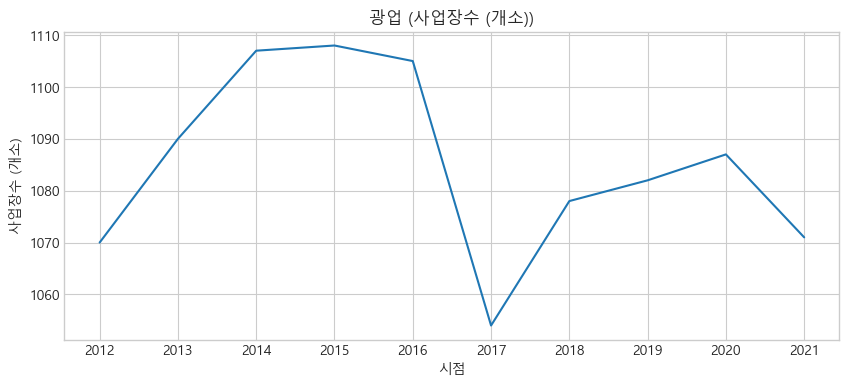

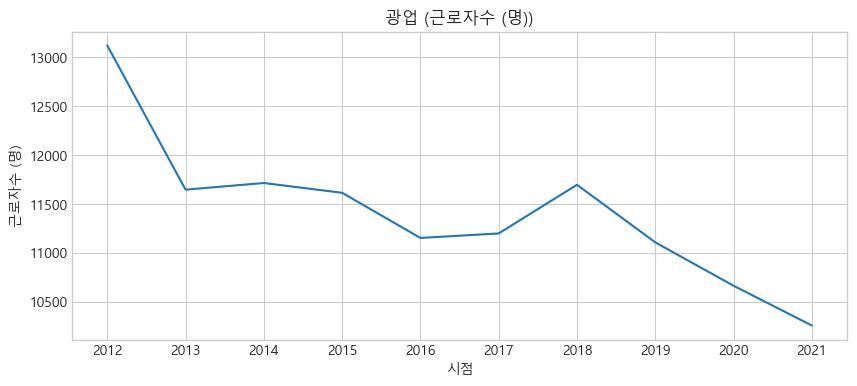

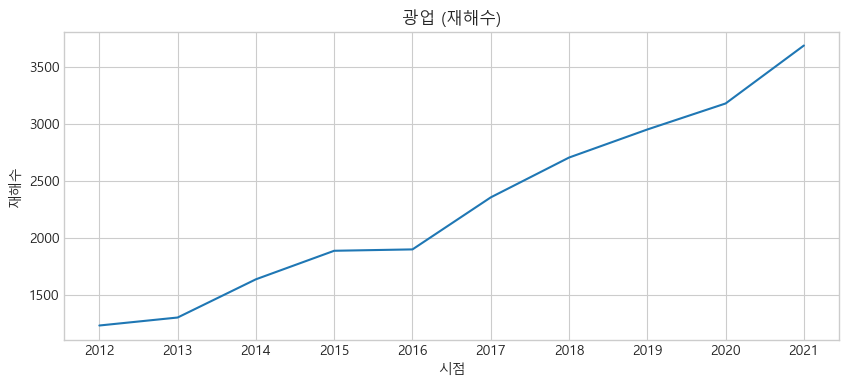



제조업
      사업장수 (개소)  근로자수 (명)    재해수
시점                              
2012     309036   3778916  32209
2013     328073   3776613  29892
2014     342700   3967908  29102
2015     361493   4161536  27439
2016     375634   4236653  26550
2017     368305   4149966  25766
2018     379387   4152058  27849
2019     386119   4045048  29766
2020     395141   4012541  29309
2021     400242   3959780  32221


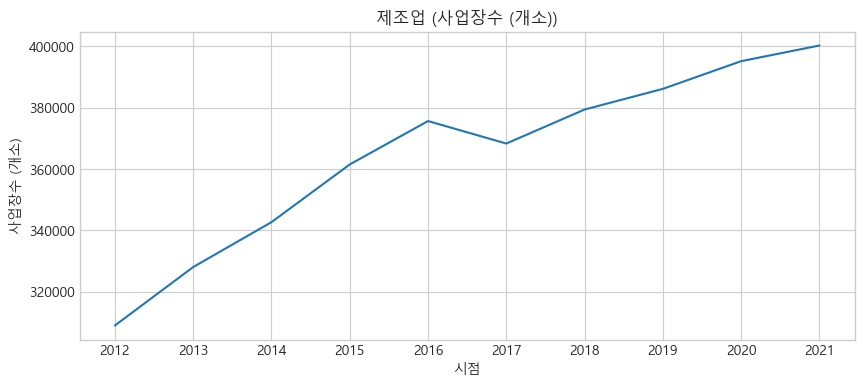

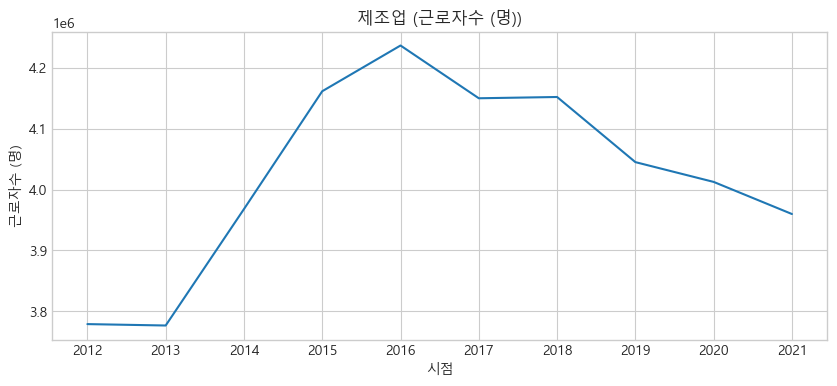

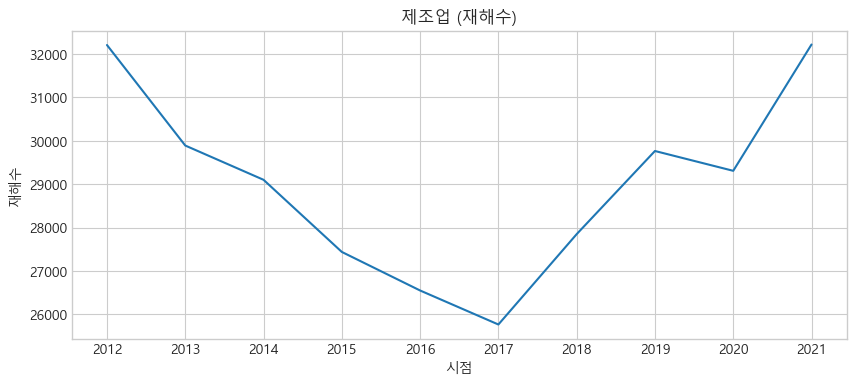



전기·가스·증기 및 수도사업
      사업장수 (개소)  근로자수 (명)  재해수
시점                            
2012       1637     56446   98
2013       1763     61143   80
2014       1817     55445  105
2015       2091     64244  104
2016       2363     72940  106
2017       2272     75496   91
2018       2493     76967  113
2019       2814     76687  116
2020       3103     79034  114
2021       3341     79791  134


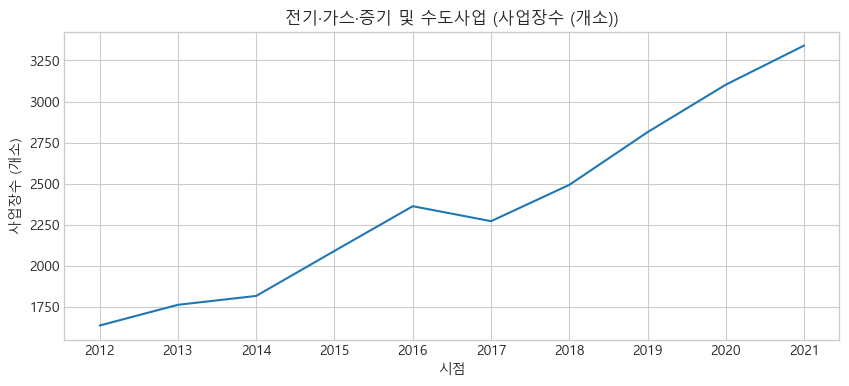

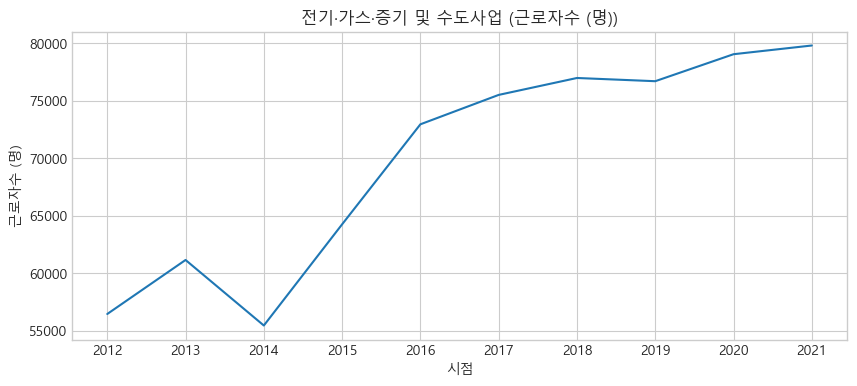

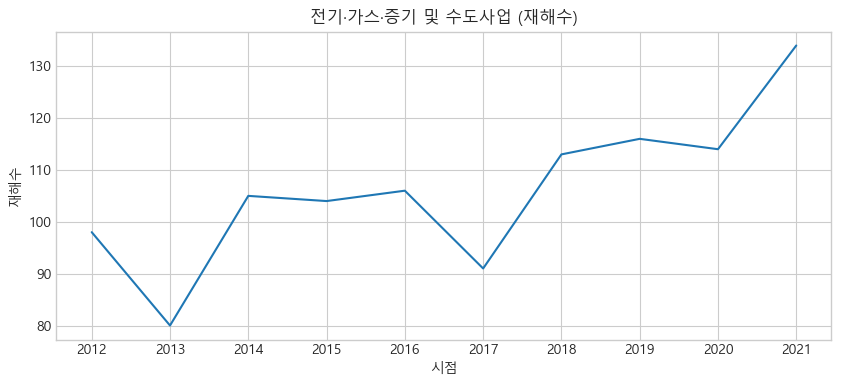



건설업
      사업장수 (개소)  근로자수 (명)    재해수
시점                              
2012     217136   2786587  23845
2013     216320   2566832  24167
2014     329061   3249687  24155
2015     380944   3358813  25625
2016     333201   3152859  27124
2017     397405   3046523  26228
2018     441758   2943742  28256
2019     378343   2487807  27728
2020     329279   2284916  27366
2021     400990   2378751  30494


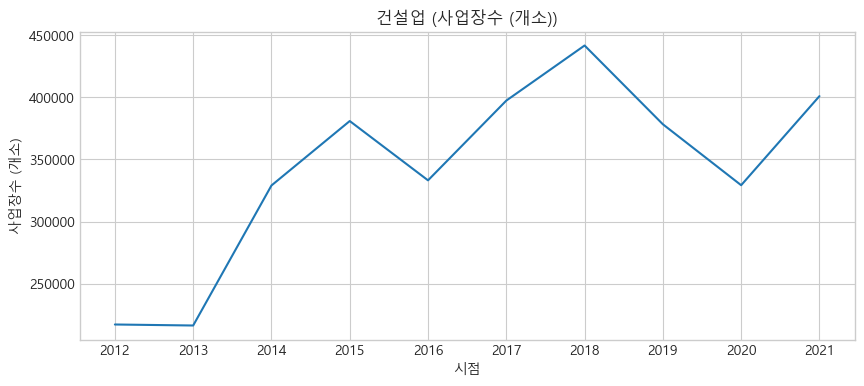

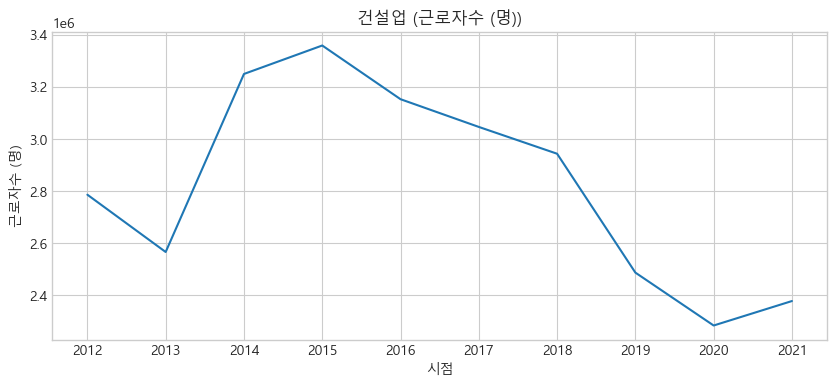

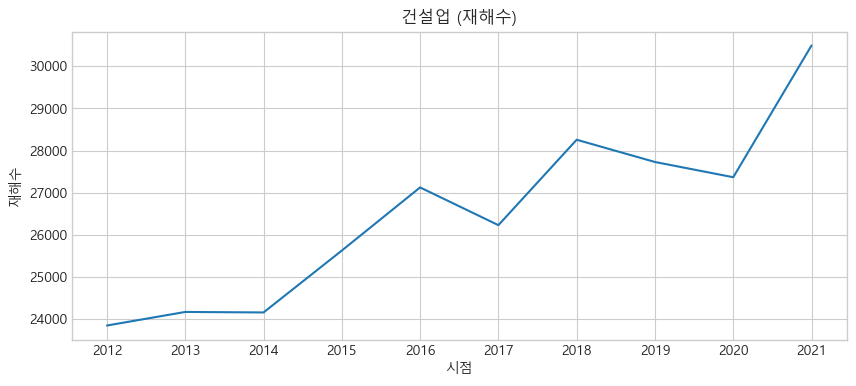



운수·창고 및 통신업
      사업장수 (개소)  근로자수 (명)    재해수
시점                              
2012      54389    810173   4341
2013      57965    774041   4375
2014      60394    776341   4307
2015      65650    805403   4190
2016      71860    836471   4243
2017      71532    838006   4358
2018      77160    873232   5448
2019      81424    910585   6326
2020      87059    936449   7401
2021      93249    993678  10249


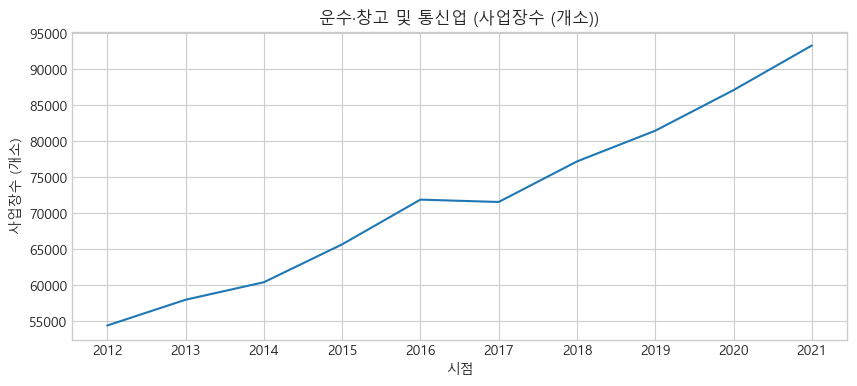

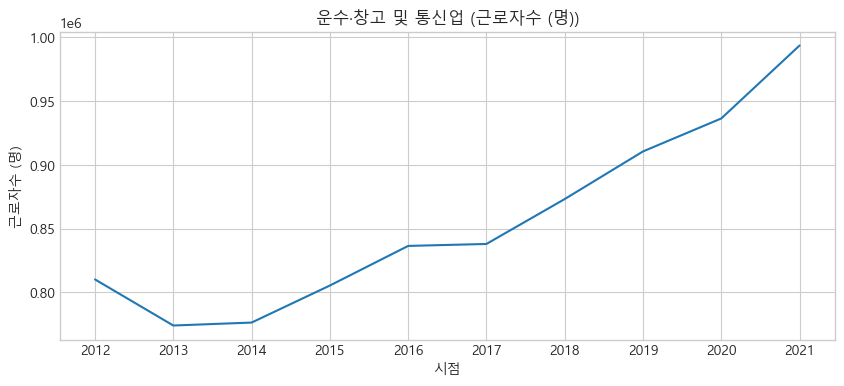

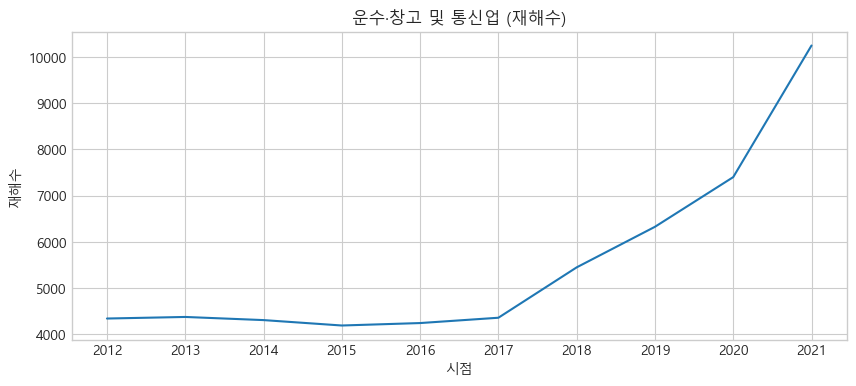



임업
      사업장수 (개소)  근로자수 (명)   재해수
시점                             
2012      11717     73759  1837
2013      11373     74389  1985
2014      11674     77486  1730
2015      12366     86565  1643
2016      12422     93493  1457
2017      11740     82773  1140
2018      12105     89751  1054
2019      12289     91682  1034
2020      12919    101404  1047
2021      14596    110395   959


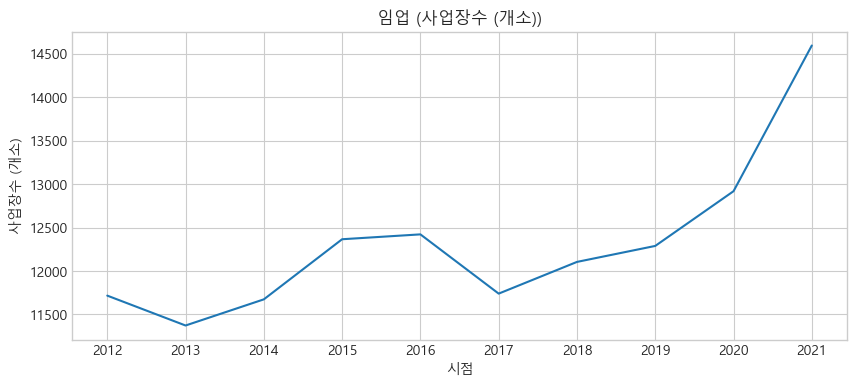

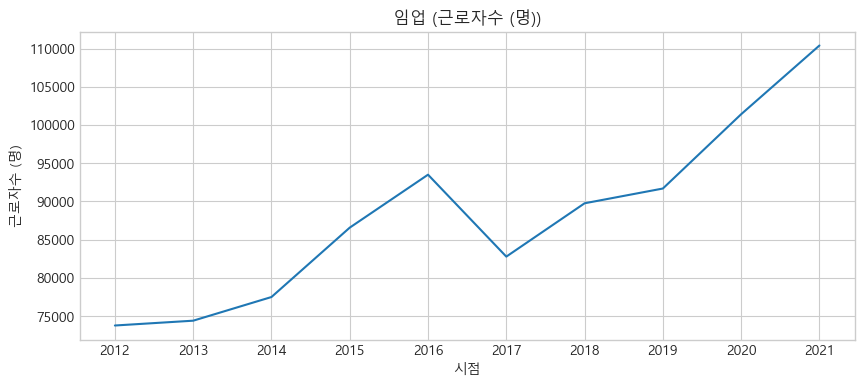

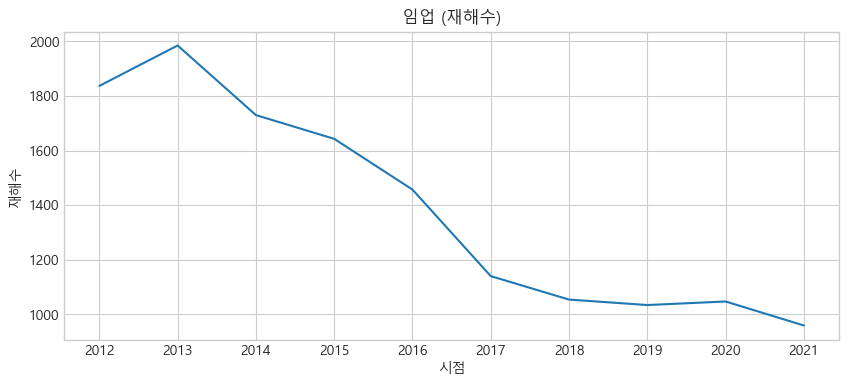



어업
      사업장수 (개소)  근로자수 (명)  재해수
시점                            
2012       1189      4117   63
2013       1345      4342   63
2014       1468      5943   84
2015       1613      5357   58
2016       1734      5591   43
2017       1633      5289   62
2018       1748      5416   67
2019       1858      5121   63
2020       1898      4973   49
2021       1918      4955   77


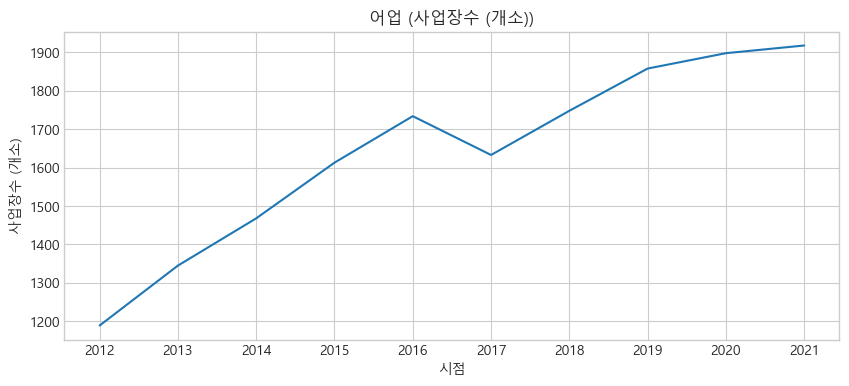

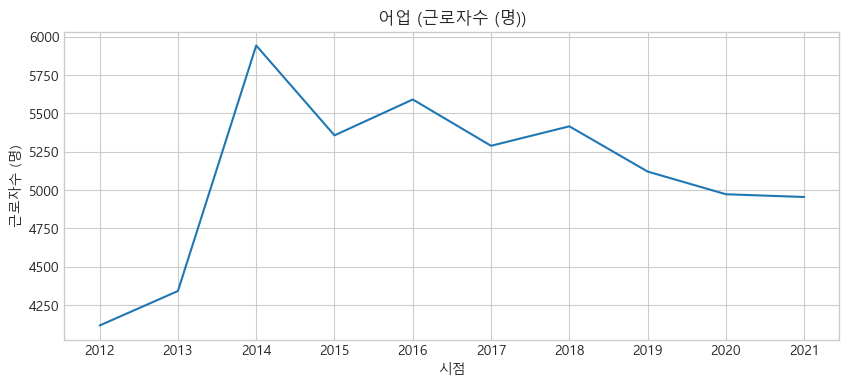

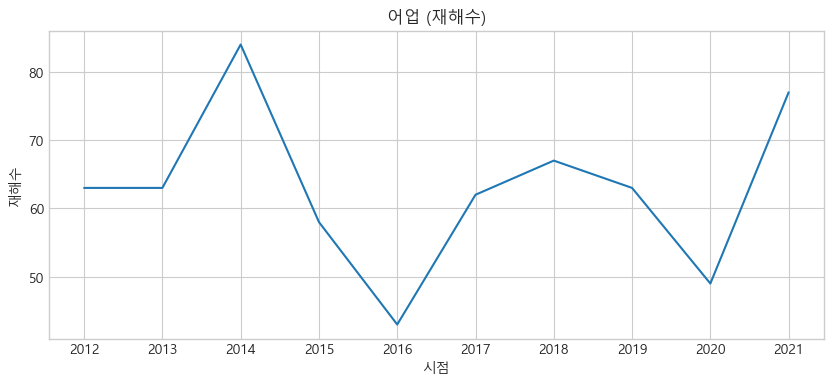



농업
      사업장수 (개소)  근로자수 (명)  재해수
시점                            
2012       7398     46489  619
2013       8841     50634  645
2014      10871     61681  636
2015      12350     68697  656
2016      14954     80990  733
2017      15452     76033  561
2018      17449     83540  662
2019      18785     79482  651
2020      19382     78940  649
2021      20302     78999  679


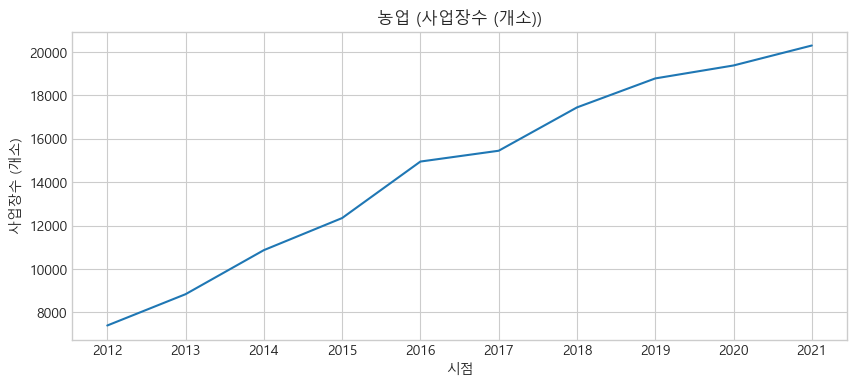

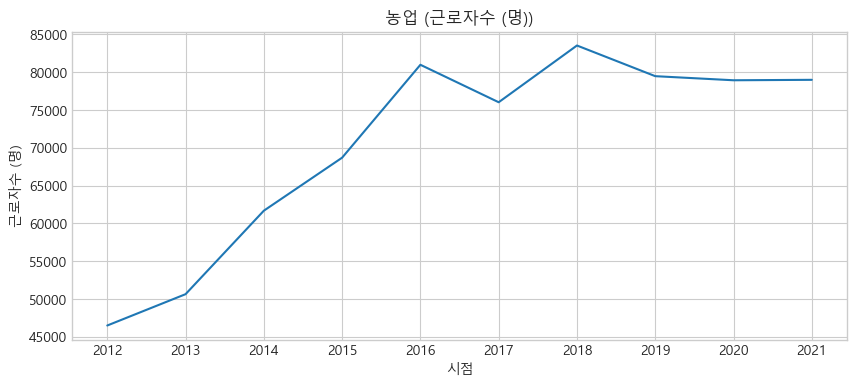

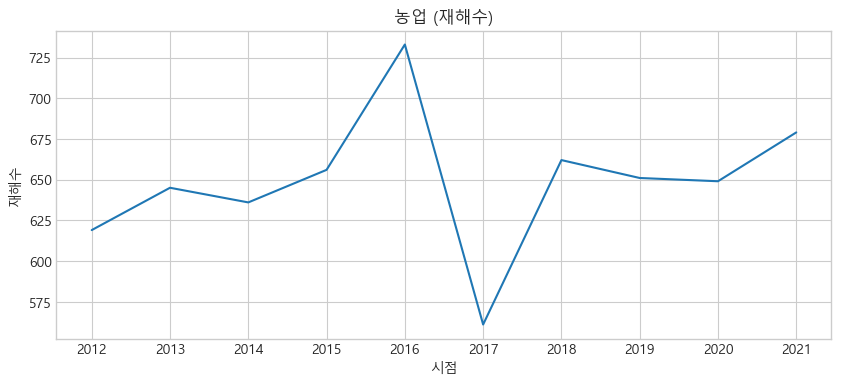



금융 및 보험업
      사업장수 (개소)  근로자수 (명)  재해수
시점                            
2012      38939    658854  403
2013      39447    652452  384
2014      38596    681236  347
2015      39789    705629  304
2016      41419    761187  294
2017      40892    764141  332
2018      41968    778105  374
2019      42320    777764  412
2020      42858    782173  357
2021      43679    781685  426


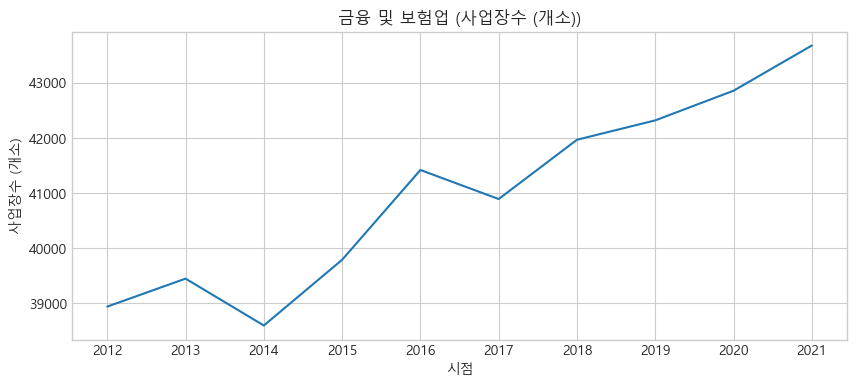

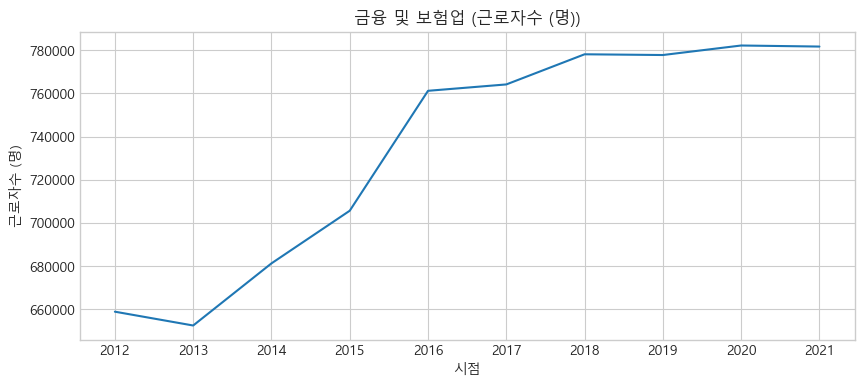

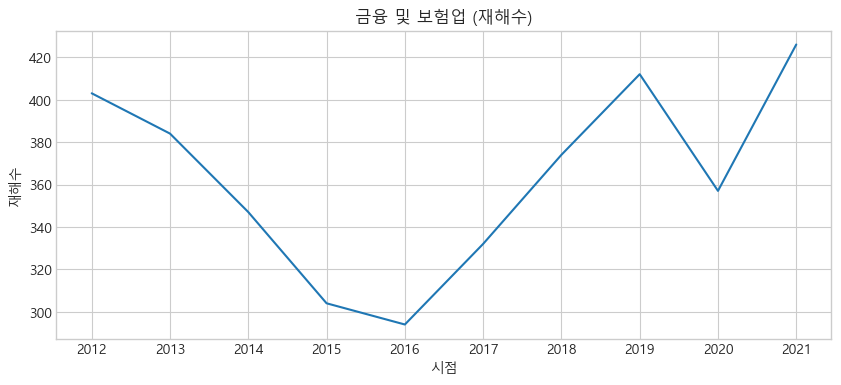



기타의 사업
      사업장수 (개소)  근로자수 (명)    재해수
시점                              
2012    1182785   7319960  29474
2013    1310840   7477135  30861
2014    1389703   8174866  30657
2015    1489782   8701072  30034
2016    1602533   9180379  29985
2017    1597079   9510716  30913
2018    1678961  10058930  37921
2019    1755840  10239876  42217
2020    1826582  10683419  40972
2021    1897247  10980274  45869


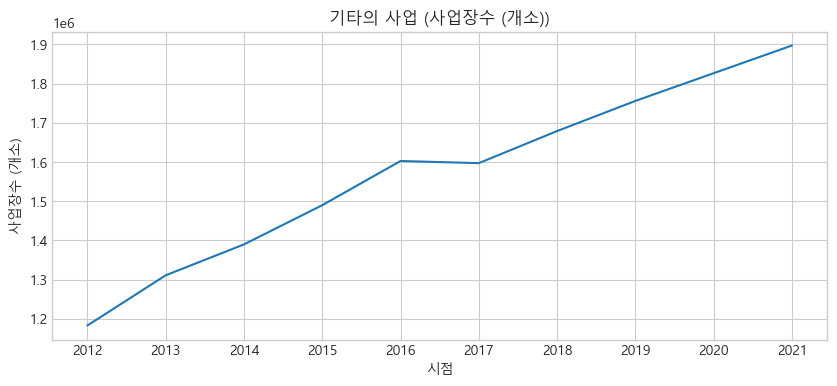

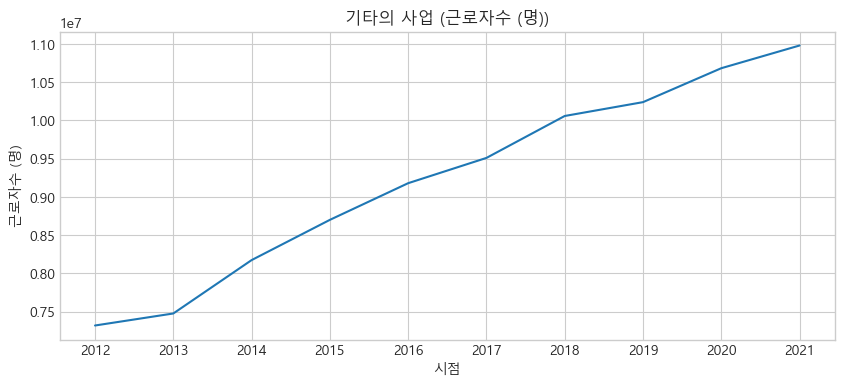

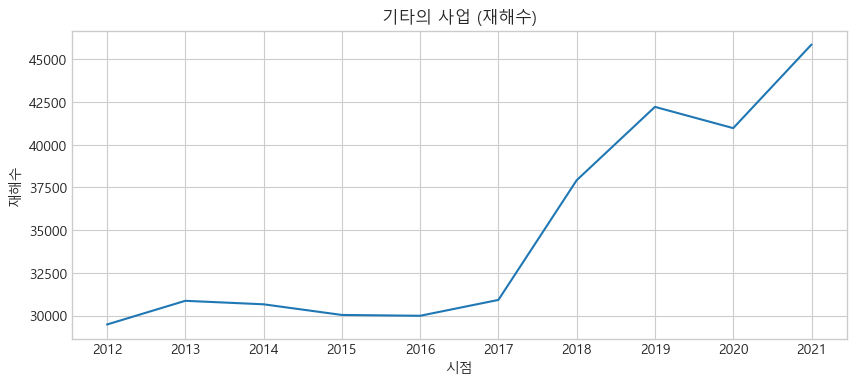

In [152]:
for c in cate1:
    print(c)
    print(df1[df1['산업중분류별(1)']==c].groupby('시점')[['사업장수 (개소)', '근로자수 (명)', '재해수']].sum())
    
    for col in ['사업장수 (개소)', '근로자수 (명)', '재해수']:

        plt.figure(figsize=(10, 4))
        sns.lineplot(data=df1[df1['산업중분류별(1)']==c].groupby('시점')[['사업장수 (개소)', '근로자수 (명)', '재해수']].sum(),
                     x='시점', y=col)
        plt.xticks(range(2012, 2022))
        plt.title(f'{c} ({col})')
        plt.show()
        
    print()
    print()

### 산업 분류별 확인

In [102]:
for c in cate1:
    print(c)
    print()
    print(df1[df1['산업중분류별(1)']==c]['산업중분류별(2)'].nunique())
    print(df1[df1['산업중분류별(1)']==c]['산업중분류별(2)'].unique())
    print()
    print()

광업

7
['석탄광업' '금속 및 비금속광업' '채석업' '석회석광업' '기타광업' '석탄광업 및 채석업'
 '석회석·금속·비금속광업 및 기타광업']


제조업

43
['식료품제조업' '담배제조업' '섬유 또는 섬유제품 제조업(갑)' '목재 및 나무제품 제조업'
 '펄프·지류제조업 및 제본 또는 인쇄물가공업' '신문·화폐발행 출판업 및 인쇄업' '화학제품제조업' '의약품 및 화장품향료 제조업'
 '고무제품제조업' '유리제조업' '도자기 및 기타요업제품 제조업' '시멘트제조업'
 '비금속광물제품 및 금속제품제조업 또는 금속가공업' '금속제련업' '금속재료품제조업' '도금업' '기계기구제조업'
 '전기기계기구제조업' '전자제품제조업' '선박건조 및 수리업' '수송용기계기구 제조업' '계량기·광학기계·기타정밀기구 제조업'
 '수제품제조업' '섬유 또는 섬유제품 제조업(을)' '자동차 및 모터사이클 수리업' '코크스 연탄 및 석유정제품 제조업'
 '기타제조업' '펄프·지류제조업' '출판·인쇄·제본업' '의약품·화장품향료·담배제조업' '도자기·기타요업제품·시멘트제조업'
 '기계기구·비금속광물제품·금속제품제조업 또는 금속가공업' '전기기계기구·전자제품·계량기·광학기계·기타정밀기구 제조업'
 '수송용기계기구 제조업·자동차 및 모터사이클 수리업' '섬유 및 섬유제품 제조업' '목재 및 종이제품 제조업'
 '화학 및 고무제품 제조업' '유리·도자기·시멘트제조업' '기계기구 비금속광물 및 금속제품제조업' '수제품 및 기타제품 제조업'
 '의약품·화장품·연탄·석유제품제조업' '기계기구·금속·비금속광물제품제조업' '전기기계기구·정밀기구·전자제품제조업']


전기·가스·증기 및 수도사업

1
['전기·가스·증기 및 수도사업']


건설업

1
['건설업']


운수·창고 및 통신업

14
['철도·궤도 및 삭도운수업' '여객자동차운수업' '화물자동차운수업' '수상운수업 항만하역 및 화물취급사업' '항공운수업'
 '운수관련서비스업' '창고업' '통신업' '소형화물운수업 및 택배업 

In [106]:
df_2021 = df1[df1['시점']==2021]
df_2021.head(3)

,시점,산업중분류별(1),산업중분류별(2),사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?)
568,2021,광업,석탄광업 및 채석업,56,2425,2923,308,120.54,1270.10
569,2021,광업,석회석·금속·비금속광업 및 기타광업,1015,7832,413,41,5.27,52.35
571,2021,제조업,식료품제조업,30752,328898,3287,28,1.00,0.85


In [110]:
df_2021.groupby('산업중분류별(1)')[['사업장수 (개소)', '근로자수 (명)']].sum()

,사업장수 (개소),근로자수 (명)
산업중분류별(1),,
건설업,400990,2378751
광업,1071,10257
금융 및 보험업,43679,781685
기타의 사업,1897247,10980274
농업,20302,78999
어업,1918,4955
운수·창고 및 통신업,93249,993678
임업,14596,110395
전기·가스·증기 및 수도사업,3341,79791


In [113]:
pd.pivot_table(data=df1, index='산업중분류별(1)', columns='시점', values='근로자수 (명)')

시점,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
산업중분류별(1),,,,,,,,,,
건설업,2.786587e+06,2.566832e+06,3.249687e+06,3.358813e+06,3.152859e+06,3.046523e+06,2.943742e+06,2.487807e+06,2.284916e+06,2378751.00
광업,2.624400e+03,2.329400e+03,2.343000e+03,2.323000e+03,2.230600e+03,5.599500e+03,5.848500e+03,5.554000e+03,5.332000e+03,5128.50
금융 및 보험업,6.588540e+05,6.524520e+05,6.812360e+05,7.056290e+05,7.611870e+05,7.641410e+05,7.781050e+05,7.777640e+05,7.821730e+05,781685.00
기타의 사업,6.099967e+05,6.230946e+05,6.812388e+05,7.250893e+05,7.650316e+05,7.925597e+05,7.737638e+05,8.533230e+05,1.335427e+06,1372534.25
농업,4.648900e+04,5.063400e+04,6.168100e+04,6.869700e+04,8.099000e+04,7.603300e+04,8.354000e+04,7.948200e+04,7.894000e+04,78999.00
어업,2.058500e+03,2.171000e+03,2.971500e+03,2.678500e+03,2.795500e+03,5.289000e+03,5.416000e+03,5.121000e+03,4.973000e+03,4955.00
운수·창고 및 통신업,9.001922e+04,8.600456e+04,8.626011e+04,8.948922e+04,9.294122e+04,1.197151e+05,1.455387e+05,2.276462e+05,3.121497e+05,331226.00
임업,7.375900e+04,7.438900e+04,7.748600e+04,8.656500e+04,9.349300e+04,8.277300e+04,8.975100e+04,9.168200e+04,1.014040e+05,110395.00
전기·가스·증기 및 수도사업,5.644600e+04,6.114300e+04,5.544500e+04,6.424400e+04,7.294000e+04,7.549600e+04,7.696700e+04,7.668700e+04,7.903400e+04,79791.00


In [116]:
df1.head(3)

,시점,산업중분류별(1),산업중분류별(2),사업장수 (개소),근로자수 (명),요양재해자수 (명),사망자수 (명),요양재해율 (%),사망만인율 (?)
2,2012,광업,석탄광업,20,4322,644,279,14.90,645.53
3,2012,광업,금속 및 비금속광업,51,375,51,20,13.60,533.33
4,2012,광업,채석업,73,540,52,9,9.63,166.67


0        923
1         71
2         61
3         32
4        144
       ...  
492    20691
493      252
494     4997
495       37
496     1794
Length: 497, dtype: int64